## Exploration of the dataset "Monthly Salary of Public Worker in Brazil"
https://www.kaggle.com/gustavomodelli/monthly-salary-of-public-worker-in-brazil/version/1

**Context**

The monthly salary of the public workers of the State of São Paulo in Brazil is a Public data available in the transparency portal of the state government at: http://www.transparencia.sp.gov.br/buscaRemunera.html

**Content**

The data is about the salary for all worker in the State for the month of October 2017. There are just over one million records. The names of the employee are anonymous represented by the variable id.

In [2]:
import pandas as pd

The CSV file is compressed in the monthly-salary-of-public-worker-in-brazil.zip
After unzip and try to read with pd.read_csv(), we will see various errors due to inconsistencies in the number of fields in some lines.

```python
data = pd.read_csv('monthly_salary_brazil.csv', index_col=0)
```

```
Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
1,OFICIAL ADMINISTRATIVO,DETRAN,2315.810,0.000,0.000,0.000,73.850,0.000,1929.340
2,SD 2C PM,PM,3034.050,0.000,0.000,0.000,651.820,0.000,2265.960
3,1TEN  PM,PM,8990.980,0.000,0.000,0.000,626.750,0.000,6933.040
4,MAJ   PM,SPPREV,13591.020,0.000,0.000,0.000,0.000,0.000,10568.360
...
845,TEC MANUT., PROJETOS E OBRAS,CPTM,3861.030,9538.260,41.810,0.000,0.000,0.000,11782.060
...
```

At line 845 we see the value of job field with an unexpected comma. This problem occurs many times in other lines.

We need to implement the data cleaning before reading it in pandas

In [33]:
import csv

inconsistent_lines_count = 0
cleaned_data_list = []

with open('monthly_salary_brazil.csv', mode='r') as csv_file:
    csv_data = csv_file.readlines()
    
    for idx, line in enumerate(csv_data):
        values = line.rstrip('\r\n').split(',')
        
        if len(values) > 10:
            inconsistent_lines_count += 1
            
            # joining 2nd and 3rd fields
            values[1] = values[1] + values[2]
            
            # removing 3rd field
            del(values[2])
        
        cleaned_data_list.append(values)

print('Number of inconsistent lines found: ', inconsistent_lines_count)

print('Saving cleaned file: monthly_salary_brazil_cleaned.csv')

with open('monthly_salary_brazil_cleaned.csv', mode='w') as cleaned_csv_file:
    csv_writer = csv.writer(cleaned_csv_file, delimiter=',')
    for item in cleaned_data_list:
        csv_writer.writerow(item)

Number of inconsistent lines found:  919
Saving cleaned file: monthly_salary_brazil_cleaned.csv


Finally we can read the cleaned data with pandas:

In [36]:
data = pd.read_csv('monthly_salary_brazil_cleaned.csv', index_col=0)

/home/luciano/Workspace/data_analysis/public_worker_salary_data_analysis/venv/lib/python3.5/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085678 entries, 1 to 1085678
Data columns (total 9 columns):
job                1085650 non-null object
sector             1085678 non-null object
Month_salary       1085678 non-null float64
13_salary          1085678 non-null float64
eventual_salary    1085678 non-null float64
indemnity          1085678 non-null float64
extra_salary       1085678 non-null float64
discount_salary    1085678 non-null float64
total_salary       1085678 non-null float64
dtypes: float64(7), object(2)
memory usage: 82.8+ MB
None


In [38]:
print(data.head(20))

                                        job     sector  Month_salary  \
Id                                                                     
1                    OFICIAL ADMINISTRATIVO     DETRAN       2315.81   
2                                  SD 2C PM         PM       3034.05   
3                                  1TEN  PM         PM       8990.98   
4                                  MAJ   PM     SPPREV      13591.02   
5                 AG.TEC. DE ASSIT. A SAUDE    HCFMUSP       4203.67   
6                                  SD 1C PM         PM       4373.69   
7                                  1CFO  PM         PM       2311.76   
8   BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP     SPPREV       1699.19   
9                                  CABO  PM         PM       3767.78   
10                                 SD 1C PM         PM       3821.99   
11             PROFESSOR EDUCACAO BASICA II     SPPREV       3340.51   
12                 COMPLEM. PENSAO - FEPASA  ADM GERAL       316

In [10]:
# list of sectors

sectors = data['sector'].unique()

print(sectors)

['DETRAN' 'PM' 'SPPREV' 'HCFMUSP' 'ADM GERAL' 'EDUCACAO' 'PGE' 'SAP'
 'PRODESP' 'SSP' 'FUND. CASA' 'SAUDE' 'CDHU' 'CPTM' 'METRO' 'DAEE' 'DAESP'
 'SABESP' 'DER' 'SAA' 'HCFMRP' 'CEETEPS' 'PROCON' 'FAZENDA' 'SECRETARIA'
 'FURP' 'ITESP' 'MEIO AMBIE' 'SUCEN' 'FDE' 'UNIVESP' 'ZOOLOGICO' 'IPT'
 'IMESP' 'SDS' 'INSTITUTO' 'CESP' 'TRANSP. ME' 'EMTU' 'PRO-SANGUE'
 'SEPLAN' 'CPOS' 'IPEM' 'FAMEMA' 'PE. ANCHIE' 'CETESB' 'DERSA' 'TURISMO'
 'FUND. FLOR' 'EMAE' 'HCFMB' 'CULTURA' 'FMSJRPRETO' 'EMPLASA' 'JUSTICA'
 'CODASP' 'FUNAP' 'SDECTI' 'CIA DOCAS' 'SERT' 'ESPORTE' 'CASA CIVIL'
 'RECURSOS H' 'FAPESP' 'ENERGIA' 'JUCESP' 'MEMORIAL' 'IPESP' 'FOSP'
 'HABITACAO' 'SEADE' 'DESENVOLVE' 'IMESC' 'ARSESP' 'SPPREVCOM' 'AGEMVALE'
 'SDPD' 'ARTESP' 'TRANSPORTE' 'CPSEC' 'CBPM' 'AGEMCAMP' 'COSESP' 'CPP'
 'AGEM' 'GAB GOV' 'SP.CLIN.FA']


In [43]:
# Education data

education_data = data.loc[data['sector'] == 'EDUCACAO']

In [44]:
print(education_data.head(20))

                               job    sector  Month_salary  13_salary  \
Id                                                                      
17   AGENTE DE ORGANIZACAO ESCOLAR  EDUCACAO       1549.39     774.69   
30     PROFESSOR EDUCACAO BASICA I  EDUCACAO       3517.15    1758.57   
49    PROFESSOR EDUCACAO BASICA II  EDUCACAO       2959.13       0.00   
63    PROFESSOR EDUCACAO BASICA II  EDUCACAO       3902.78       0.00   
76     PROFESSOR EDUCACAO BASICA I  EDUCACAO        965.48       0.00   
105  AGENTE DE ORGANIZACAO ESCOLAR  EDUCACAO       1345.79     224.29   
108   PROFESSOR EDUCACAO BASICA II  EDUCACAO        785.16     392.58   
109   PROFESSOR EDUCACAO BASICA II  EDUCACAO       6308.20    3154.09   
127   PROFESSOR EDUCACAO BASICA II  EDUCACAO       1509.92       0.00   
147   PROFESSOR EDUCACAO BASICA II  EDUCACAO       5027.37       0.00   
152   PROFESSOR EDUCACAO BASICA II  EDUCACAO       4267.19       0.00   
160   PROFESSOR EDUCACAO BASICA II  EDUCACAO       

In [45]:
print(education_data.describe())

        Month_salary      13_salary  eventual_salary      indemnity  \
count  259238.000000  259238.000000    259238.000000  259238.000000   
mean     2788.508586     111.961624        82.497940      16.660125   
std      1619.317960     444.399615       743.722249     292.181877   
min         0.000000   -1915.600000    -18586.410000   -3503.790000   
25%      1640.360000       0.000000         0.000000       0.000000   
50%      2451.390000       0.000000         0.000000       0.000000   
75%      3577.420000       0.000000         0.000000       0.000000   
max     19467.940000    8739.480000     51111.550000   13773.280000   

        extra_salary  discount_salary   total_salary  
count  259238.000000    259238.000000  259238.000000  
mean      140.528147        -0.082418    2231.600333  
std       602.169734        38.367101    1630.823378  
min    -26393.950000    -19467.940000  -25405.700000  
25%        13.500000         0.000000    1296.717500  
50%        85.490000         0

In [40]:
# Education jobs

education_jobs = education_data['job'].unique()

print(education_jobs)

['AGENTE DE ORGANIZACAO ESCOLAR' 'PROFESSOR EDUCACAO BASICA I'
 'PROFESSOR EDUCACAO BASICA II' 'SECRETARIO DE ESCOLA'
 'AGENTE DE SERVICOS ESCOLARES' 'AUXILIAR SERV. GERAIS'
 'SUPERVISOR DE ENSINO' 'DIRETOR DE ESCOLA' 'OFICIAL ADMINISTRATIVO'
 'DIRETOR I' 'DIRETOR II' 'EXECUTIVO PUBLICO' 'ASSESSOR II'
 'DIRIGENTE REGIONAL DE ENSINO' 'DIRETOR TECNICO I' 'ASSESSOR TECNICO I'
 'DIRETOR TECNICO II' 'ANALISTA ADMINISTRATIVO' 'ASSIST.ADM.ESCOLAR'
 'ASSESSOR TECNICO DE GABINETE III' 'ANALISTA SOCIO CULTURAL'
 'ASSESSOR TECNICO V' 'AG.TEC. DE ASSIT. A SAUDE' 'DIRETOR TECNICO III'
 'ASSESSOR I' 'ASSESSOR TECNICO DE GABINETE II' 'PROFESSOR II'
 'ASSESSOR TECNICO II' 'ASSESSOR TECNICO III' 'OUTROS VINCULOS'
 'ASSESSOR TECNICO IV' 'ASSESSOR TECNICO DE GABINETE IV' 'COORDENADOR'
 'ENCARREGADO I' 'OFICIAL OPERACIONAL' 'ASSESSOR TECN.COORDENADOR'
 'ESCRIVAO POL.CLASSE ESPECIAL' 'SECRETARIO ADJUNTO' 'ESTAGIARIO'
 'ASSESSOR TECNICO DE GABINETE I' 'CHEFE I' 'SECRETARIO DE ESTADO'
 'COORDENADOR PEDAGOGIC

In [51]:
professor_educacao_basica_i = education_data.loc[education_data['job'] == 'PROFESSOR EDUCACAO BASICA I',:]

professor_educacao_basica_i.head()

,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
Id,,,,,,,,,
30,PROFESSOR EDUCACAO BASICA I,EDUCACAO,3517.15,1758.57,0.00,0.0,512.92,0.0,4106.75
76,PROFESSOR EDUCACAO BASICA I,EDUCACAO,965.48,0.00,0.00,0.0,175.07,0.0,1063.32
307,PROFESSOR EDUCACAO BASICA I,EDUCACAO,2606.30,1303.14,0.00,0.0,132.42,0.0,2873.69
331,PROFESSOR EDUCACAO BASICA I,EDUCACAO,1421.81,0.00,42.98,0.0,188.29,0.0,1154.48
383,PROFESSOR EDUCACAO BASICA I,EDUCACAO,2298.79,-14.97,-230.95,0.0,150.87,0.0,2008.49


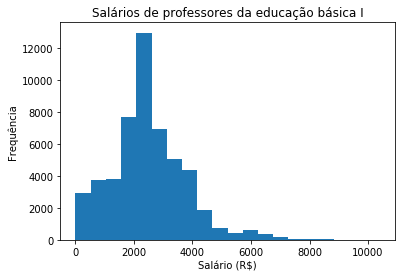

In [62]:
import matplotlib.pyplot as plt

plt.hist(professor_educacao_basica_i['Month_salary'], bins=20)
plt.title('Professores da educação básica I (SP)')
plt.ylabel('Frequência')
plt.xlabel('Salário (R\$)')
plt.show()

In [68]:
# Number of workers of each education job

print(type(education_data))
print(education_data.groupby('job')['sector'].count())

<class 'pandas.core.frame.DataFrame'>
job
AG.TEC. DE ASSIT. A SAUDE               46
AGENTE DE ORGANIZACAO ESCOLAR        33516
AGENTE DE SERVICOS ESCOLARES          5464
ANALISTA ADMINISTRATIVO                364
ANALISTA SOCIO CULTURAL                 49
ASSESSOR DE GABINETE I                   1
ASSESSOR I                              19
ASSESSOR II                            310
ASSESSOR TECN.COORDENADOR                9
ASSESSOR TECNICO DE GABINETE I           6
ASSESSOR TECNICO DE GABINETE II         16
ASSESSOR TECNICO DE GABINETE III        16
ASSESSOR TECNICO DE GABINETE IV         18
ASSESSOR TECNICO I                      76
ASSESSOR TECNICO II                     26
ASSESSOR TECNICO III                    39
ASSESSOR TECNICO IV                     18
ASSESSOR TECNICO V                      23
ASSIST.ADM.ESCOLAR                     106
AUXILIAR SERV. GERAIS                  659
CHEFE DE GABINETE                        1
CHEFE I                                  3
COORDENADOR 